# Morpheus Demonstration

# Preliminaries

## Imports

In [1]:
import os
import sys
import networkx as nx
import numpy as np


from os.path import dirname
from networkx.drawing.nx_pydot import to_pydot

# Import morpheus
note_dir = dirname(os.getcwd())
root_dir = dirname(note_dir)
src_dir = os.path.join(root_dir, "src")

sys.path.append(src_dir)

import morpheus
from morpheus import Morpheus
from morpheus.tests import (
    default_dataset,
    default_m_list_for_mercs,
    random_m_list_for_mercs,
)

# Visuals
from morpheus.graph import to_dot

# Ipython things
from IPython.display import Image, display, SVG
from IPython.core.display import HTML

import matplotlib as mpl
import matplotlib.pyplot as plt

## Methods

In [2]:
def to_dot(g, dname='tmp', fname='test', extension='.dot', return_fname=False, ortho=False, fi_labels=False):
    """
    Convert a graph to a dot file.
    """
    
    # Layout
    if fi_labels:
        for e in g.edges():
            g.edges()[e]['label'] = "{0:.2f}".format(g.edges()[e].get('fi', 0))
    
    dot = nx.drawing.nx_pydot.to_pydot(g)
    dot.set('rankdir', 'BT')
    
    if ortho:
        dot.set('splines', 'ortho')
    
    # To file
    full_fname = os.path.join(dname, fname+extension)
    
    with open(full_fname, "w") as f:
        print(dot.to_string(), file=f)
    
    if return_fname:
        return full_fname
    else:
        return

## General Constants

In [3]:
random_state=800

# Initialize

In [4]:
m = Morpheus(random_state=random_state,
             prediction_algorithm='mi',
             clf_criterion='entropy',
             rgr_criterion='mae',
             selection_algorithm='random',
             nb_iterations=3,
             fraction_missing=0.5,
             max_depth=15,
             regression_max_depth=25)

## Inspection

Let us investigate what is now in such a Morpheus model.

In [5]:
m.configuration

{'selection': {'nb_targets': 1,
  'nb_iterations': 3,
  'fraction_missing': 0.5,
  'random_state': 800},
 'classification': {'criterion': 'entropy',
  'splitter': 'best',
  'max_depth': 15,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'min_weight_fraction_leaf': 0.0,
  'max_features': None,
  'random_state': 800,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_impurity_split': None,
  'class_weight': None,
  'presort': False},
 'regression': {'criterion': 'mae',
  'splitter': 'best',
  'max_depth': 25,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'min_weight_fraction_leaf': 0.0,
  'max_features': None,
  'random_state': 800,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_impurity_split': None,
  'presort': False},
 'prediction': {'random_state': 800},
 'inference': {}}

# Training

In [6]:
df_train, df_test = default_dataset()
df_train.head()

,0,1,2,3,4,5,6,y
0,0.157326,-1.139498,-3.413978,0.450054,0.955829,0.131576,-0.421599,0
1,-2.415292,-3.886052,-0.958055,0.320644,0.583524,0.346293,0.162183,1
2,-2.182962,-2.658076,-3.260118,0.603738,-0.094709,-0.884652,1.249092,1
3,-0.693264,4.014894,2.754989,5.113562,4.314176,2.977437,-0.004439,1
4,-0.449253,1.783561,-0.830222,1.902207,1.374010,2.174907,3.159475,1


In [7]:
X = df_train.values

In [8]:
X.shape

(800, 8)

In [9]:
m.fit(X)

In [10]:
m.m_codes

array([[-1., -1.,  0., -1., -1.,  1., -1., -1.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  1., -1.],
       [-1.,  1., -1., -1.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1.,  1.],
       [-1.,  0., -1., -1.,  1.,  0., -1., -1.],
       [ 0., -1.,  1., -1., -1., -1.,  0., -1.],
       [ 0.,  0.,  0.,  1.,  0., -1., -1., -1.],
       [ 1.,  0.,  0.,  0.,  0., -1.,  0., -1.],
       [-1.,  0.,  0., -1.,  0., -1., -1.,  1.],
       [ 1., -1., -1.,  0.,  0.,  0., -1., -1.],
       [-1.,  0., -1.,  1., -1.,  0.,  0.,  0.],
       [ 0.,  0., -1., -1.,  1., -1.,  0., -1.],
       [ 0.,  0.,  1.,  0.,  0., -1., -1., -1.],
       [-1.,  0.,  0., -1.,  0.,  1.,  0., -1.],
       [-1., -1., -1.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1., -1., -1., -1.,  0.,  1., -1.],
       [ 1., -1.,  0., -1.,  0.,  0.,  0.,  0.],
       [-1.,  0., -1., -1.,  1., -1.,  0., -1.],
       [-1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [-1.,  0.,  0

In [11]:
m.m_list[4:6]

[DecisionTreeRegressor(criterion='mae', max_depth=25, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=800, splitter='best'),
 DecisionTreeRegressor(criterion='mae', max_depth=25, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=800, splitter='best')]

In [12]:
m.metadata

{'attributes': {0, 1, 2, 3, 4, 5, 6, 7},
 'n_attributes': 8,
 'types': [dtype('float64'),
  dtype('float64'),
  dtype('float64'),
  dtype('float64'),
  dtype('float64'),
  dtype('float64'),
  dtype('float64'),
  dtype('float64')],
 'nominal_attributes': set(),
 'numeric_attributes': {0, 1, 2, 3, 4, 5, 6, 7}}

In [13]:
m.fit(X, nominal_attributes={7})

In [14]:
m.metadata

{'attributes': {0, 1, 2, 3, 4, 5, 6, 7},
 'n_attributes': 8,
 'types': [dtype('float64'),
  dtype('float64'),
  dtype('float64'),
  dtype('float64'),
  dtype('float64'),
  dtype('float64'),
  dtype('float64'),
  dtype('float64')],
 'nominal_attributes': {7},
 'numeric_attributes': {0, 1, 2, 3, 4, 5, 6}}

# Basic Prediction

In [15]:
X = df_test.values

In [16]:
m.predict(X)

dict_keys(['d-06', 'd-05', 'd-04', 'd-03', 'd-02', 'd-01'])
dict_keys(['d-06', 'd-05', 'd-04', 'd-03', 'd-02', 'd-01', 'f-08', 'd-00'])
dict_keys(['d-06', 'd-05', 'd-04', 'd-03', 'd-02', 'd-01', 'f-08', 'd-00', 'f-23'])


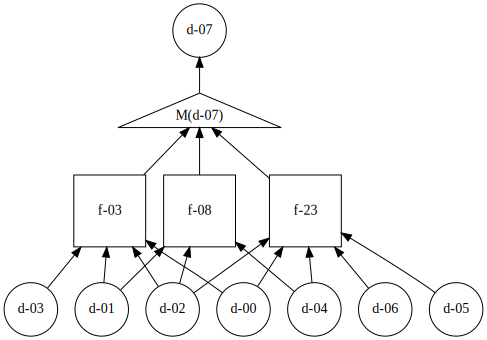

In [17]:
m.show_q_diagram()

# Parallel Composition

dict_keys(['I(d-00)', 'd-06', 'd-05', 'd-04', 'd-03', 'd-02'])
dict_keys(['I(d-00)', 'd-06', 'd-05', 'd-04', 'd-03', 'd-02', 'f-23', 'd-01'])
dict_keys(['I(d-00)', 'd-06', 'd-05', 'd-04', 'd-03', 'd-02', 'f-23', 'd-01', 'f-08'])


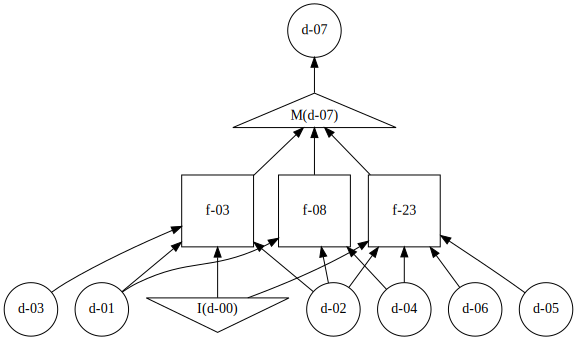

In [18]:
m = Morpheus(random_state=random_state,
             prediction_algorithm='mi',
             clf_criterion='entropy',
             rgr_criterion='mae',
             selection_algorithm='random',
             nb_iterations=3,
             fraction_missing=0.5,
             max_depth=15,
             regression_max_depth=25)

df_train, df_test = default_dataset()

m.fit(df_train.values)
m.predict(df_test.values, q_code=np.array([-1,0,0,0,0,0,0,1]))
m.show_q_diagram()


                We have selected    1 model(s) 
                at threshold:       0.90
                with model ids:     [{'f-08'}]
                

dict_keys(['d-04', 'd-02', 'd-01'])


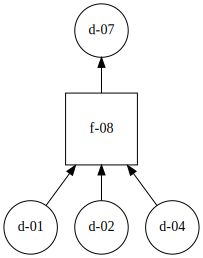

In [19]:
m = Morpheus(random_state=random_state,
             prediction_algorithm='mrai',
             clf_criterion='entropy',
             rgr_criterion='mae',
             selection_algorithm='random',
             nb_iterations=3,
             fraction_missing=0.5,
             max_depth=15,
             regression_max_depth=25)

df_train, df_test = default_dataset()

m.fit(df_train.values)
m.predict(df_test.values, q_code=np.array([-1,0,0,0,0,0,0,1]))
m.show_q_diagram()

# Sequential Composition

In [33]:
m = Morpheus(random_state=802,
             prediction_algorithm='it',
             clf_criterion='entropy',
             rgr_criterion='mae',
             selection_algorithm='random',
             nb_iterations=20,
             fraction_missing=0.5,
             max_depth=15,
             regression_max_depth=25)

df_train, df_test = default_dataset()

m.fit(df_train.values)
m.predict(df_test.values, q_code=np.array([-1,-1,-1,0,0,-1,0,1]))
m.show_q_diagram(fi_labels=True)

In [43]:
m = Morpheus(random_state=random_state,
             prediction_algorithm='rw',
             clf_criterion='entropy',
             rgr_criterion='mae',
             selection_algorithm='random',
             nb_iterations=10,
             max_steps=64,
             fraction_missing=0.5,
             max_depth=15,
             regression_max_depth=25)

df_train, df_test = default_dataset()

m.fit(df_train.values)


AVL DESC: {0, 6}
AVL DESC: {0, 4, 6}
AVL DESC: {0, 1, 4, 6}
dict_keys(['I(d-02)', 'I(d-03)', 'd-00', 'I(d-01)', 'd-06'])
dict_keys(['I(d-02)', 'I(d-03)', 'd-00', 'I(d-01)', 'd-06', 'f-18', 'd-04'])
dict_keys(['I(d-02)', 'I(d-03)', 'd-00', 'I(d-01)', 'd-06', 'f-18', 'd-04', 'f-62', 'd-01'])


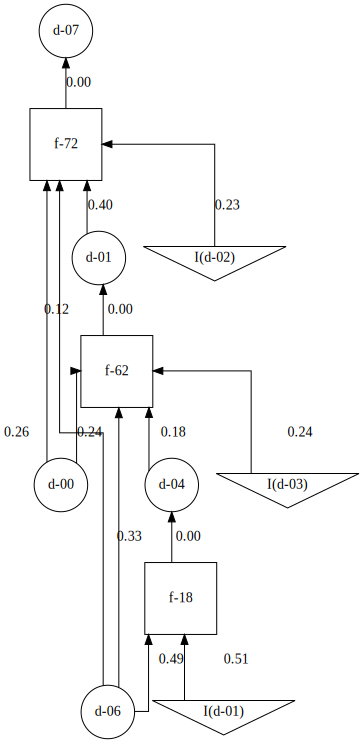

In [46]:
m.predict(df_test.values, q_code=np.array([0,-1,-1,-1,-1,-1,0,1]))
m.show_q_diagram(fi_labels=True, ortho=True)

AVL DESC: {0, 1, 3, 6}
AVL DESC: {0, 1, 3, 4, 6}
dict_keys(['I(d-02)', 'd-01', 'I(d-07)', 'd-03'])
dict_keys(['I(d-02)', 'd-01', 'I(d-07)', 'd-03', 'f-79', 'd-04'])


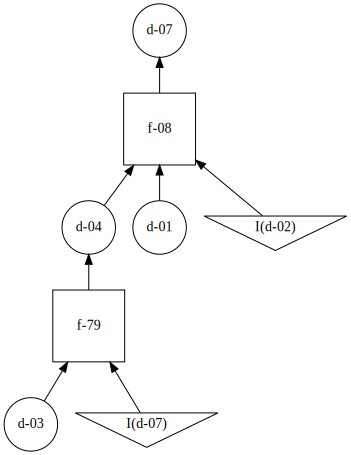

# Imputation

# Generality

In the previous sections, I have demonstrated the current capa